# Baseball Databank

Site: https://www.seanlahman.com/baseball-archive/statistics/

Documentation: https://www.seanlahman.com/files/database/readme2021.txt

# 2.2 Batting Table

playerID       Player ID code

yearID         Year

stint          player's stint (order of appearances within a season)

teamID         Team

lgID           League

G              Games

AB             At Bats

R              Runs

H              Hits

2B             Doubles

3B             Triples

HR             Homeruns

RBI            Runs Batted In

SB             Stolen Bases

CS             Caught Stealing

BB             Base on Balls

SO             Strikeouts

IBB            Intentional walks

HBP            Hit by pitch

SH             Sacrifice hits

SF             Sacrifice flies

GIDP           Grounded into double plays

# 2.3 Pitching table

playerID       Player ID code

yearID         Year

stint          player's stint (order of appearances within a season)

teamID         Team

lgID           League

W              Wins

L              Losses

G              Games

GS             Games Started

CG             Complete Games 

SHO            Shutouts

SV             Saves

IPOuts         Outs Pitched (innings pitched x 3)

H              Hits

ER             Earned Runs

HR             Homeruns

BB             Walks

SO             Strikeouts

BAOpp          Opponent's Batting Average

ERA            Earned Run Average

IBB            Intentional Walks

WP             Wild Pitches

HBP            Batters Hit By Pitch

BK             Balks

BFP            Batters faced by Pitcher

GF             Games Finished

R              Runs Allowed

SH             Sacrifices by opposing batters

SF             Sacrifice flies by opposing batters

GIDP           Grounded into double plays by opposing batter

In [66]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import minmax_scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.decomposition import PCA

In [82]:
people = pd.read_csv("baseballdatabank-2022.2/core/People.csv")
batting = pd.read_csv("baseballdatabank-2022.2/core/Batting.csv")
pitching = pd.read_csv("baseballdatabank-2022.2/core/Pitching.csv")
war_bat = pd.read_csv('war-archive/war_daily_bat.txt', sep=",")
war_pitch = pd.read_csv('war-archive/war_daily_pitch.txt', sep=",")

In [84]:
people['finalGame'] = people.finalGame.map(pd.to_datetime)

In [85]:
people[people.finalGame >= pd.to_datetime('2021-01-01')]

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
5,abadfe01,1985.0,12.0,17.0,D.R.,La Romana,La Romana,NaN,NaN,NaN,...,Abad,Fernando Antonio,235.0,74.0,L,L,2010-07-28,2021-10-01,abadf001,abadfe01
10,abbotco01,1995.0,9.0,20.0,USA,CA,San Diego,NaN,NaN,NaN,...,Abbott,Cory James,210.0,73.0,R,R,2021-06-05,2021-10-02,abboc001,abbotco01
34,abreual01,1995.0,9.0,26.0,D.R.,Monte Cristi,Guayubin,NaN,NaN,NaN,...,Abreu,Albert Enmanuel,190.0,74.0,R,R,2020-08-08,2021-10-01,abrea001,abreual01
36,abreubr01,1997.0,4.0,22.0,D.R.,Distrito Nacional,Santo Domingo,NaN,NaN,NaN,...,Abreu,Bryan Enrique,225.0,73.0,R,R,2019-07-31,2021-08-29,abreb002,abreubr01
38,abreujo02,1987.0,1.0,29.0,Cuba,Cienfuegos,Cienfuegos,NaN,NaN,NaN,...,Abreu,Jose Dariel,235.0,75.0,R,R,2014-03-31,2021-10-02,abrej003,abreujo02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20338,zimmejo02,1986.0,5.0,23.0,USA,WI,Auburndale,NaN,NaN,NaN,...,Zimmermann,Jordan M.,225.0,74.0,R,R,2009-04-20,2021-05-07,zimmj003,zimmejo02
20339,zimmeky01,1991.0,9.0,13.0,USA,CA,San Francisco,NaN,NaN,NaN,...,Zimmer,Kyle Joseph,225.0,75.0,R,R,2019-03-31,2021-10-02,zimmk001,zimmeky01
20341,zimmery01,1984.0,9.0,28.0,USA,NC,Washington,NaN,NaN,NaN,...,Zimmerman,Ryan Wallace,215.0,75.0,R,R,2005-09-01,2021-10-03,zimmr001,zimmery01
20360,zuberty01,1995.0,6.0,16.0,USA,AR,White Hall,NaN,NaN,NaN,...,Zuber,John Tyler,175.0,71.0,R,R,2020-07-24,2021-09-30,zubet001,zuberty01


In [23]:
people["finalGame"] = people.finalGame.map(pd.to_datetime)
people['birthYear'] = people.birthYear.map(float)

In [35]:
start, end = pd.to_datetime('2010-01-01'), pd.to_datetime('2020-01-01')

people_subset = people[(people.birthYear > float(1985))].reset_index(drop=True)

In [36]:
ids = list(people_subset.bbrefID)
batting_subset = batting[batting.playerID.isin(ids)]
pitching_subset = pitching[pitching.playerID.isin(ids)]

In [40]:
batting_subset = batting_subset[['G', 'AB', 'R', 'H', '2B', '3B', 'HR']]

In [63]:
batting_subset

,G,AB,R,H,2B,3B,HR
3675,1,4,0,0,0,0,0
4864,27,106,15,30,7,0,3
78541,7,20,3,8,2,0,0
81221,86,308,45,85,19,0,3
82554,87,321,39,77,11,4,3
...,...,...,...,...,...,...,...
110489,14,4,0,0,0,0,0
110490,2,1,0,0,0,0,0
110491,52,0,0,0,0,0,0
110493,31,1,0,0,0,0,0


In [53]:
df = pd.DataFrame()

for col in batting_subset.columns:

    scaled_data = minmax_scale(batting_subset[f"{col}"])
    df[f"{col}"] = scaled_data


In [75]:
kmeans = KMeans(n_clusters=4)

y = kmeans.fit_predict(df[['G', '2B', '3B', 'HR']])

df['Cluster'] = y

print(df.head())

          G        AB         R         H        2B        3B        HR  \
0  0.000000  0.005874  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.161491  0.155653  0.109489  0.133333  0.125000  0.000000  0.050847   
2  0.037267  0.029369  0.021898  0.035556  0.035714  0.000000  0.000000   
3  0.527950  0.452276  0.328467  0.377778  0.339286  0.000000  0.050847   
4  0.534161  0.471366  0.284672  0.342222  0.196429  0.266667  0.050847   

   Cluster  
0        1  
1        1  
2        1  
3        0  
4        0  


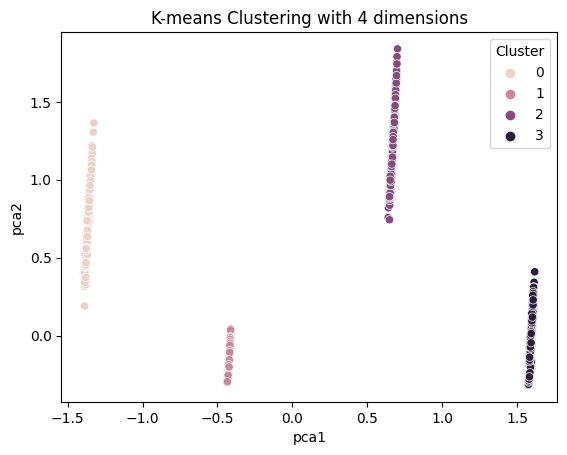

In [76]:
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(df)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=df['Cluster'], data=results)
plt.title('K-means Clustering with 4 dimensions')
plt.show()